In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dendog/unnamed-chunk-13-1.png


# 1. K Means:

<font color="blue">

    *This algorithm allows us to cluster and label data as an unsupervised machine learning algorithm

    *We apply this algorithm for unlabeled data and it attempts to group similar clusters in unlabeled data.

    *The overall goal is to divide data into distinct groups such that observations within each group are similar

<font color="blue">
Despite its simplicity, the **K-means** is vastly used for clustering in many data science applications, especially useful if you need to quickly discover insights from **unlabeled data**. In this notebook, you will learn how to use k-Means for customer segmentation.

Some real-world applications of k-means:

-   Customer segmentation
-   Understand what the visitors of a website are trying to accomplish
-   Pattern recognition
-   Machine learning
-   Data compression

* The algorithm

        -Choose a number of Clusters K
        -Randomly assign each point to a specific cluster
        -Until clusters stop changing, repeat the following steps:
        -For each cluster, compute the cluster's centroid by taking the mean vector points in the cluster
        -Assign each data point to the cluster for which the centroid is the closest

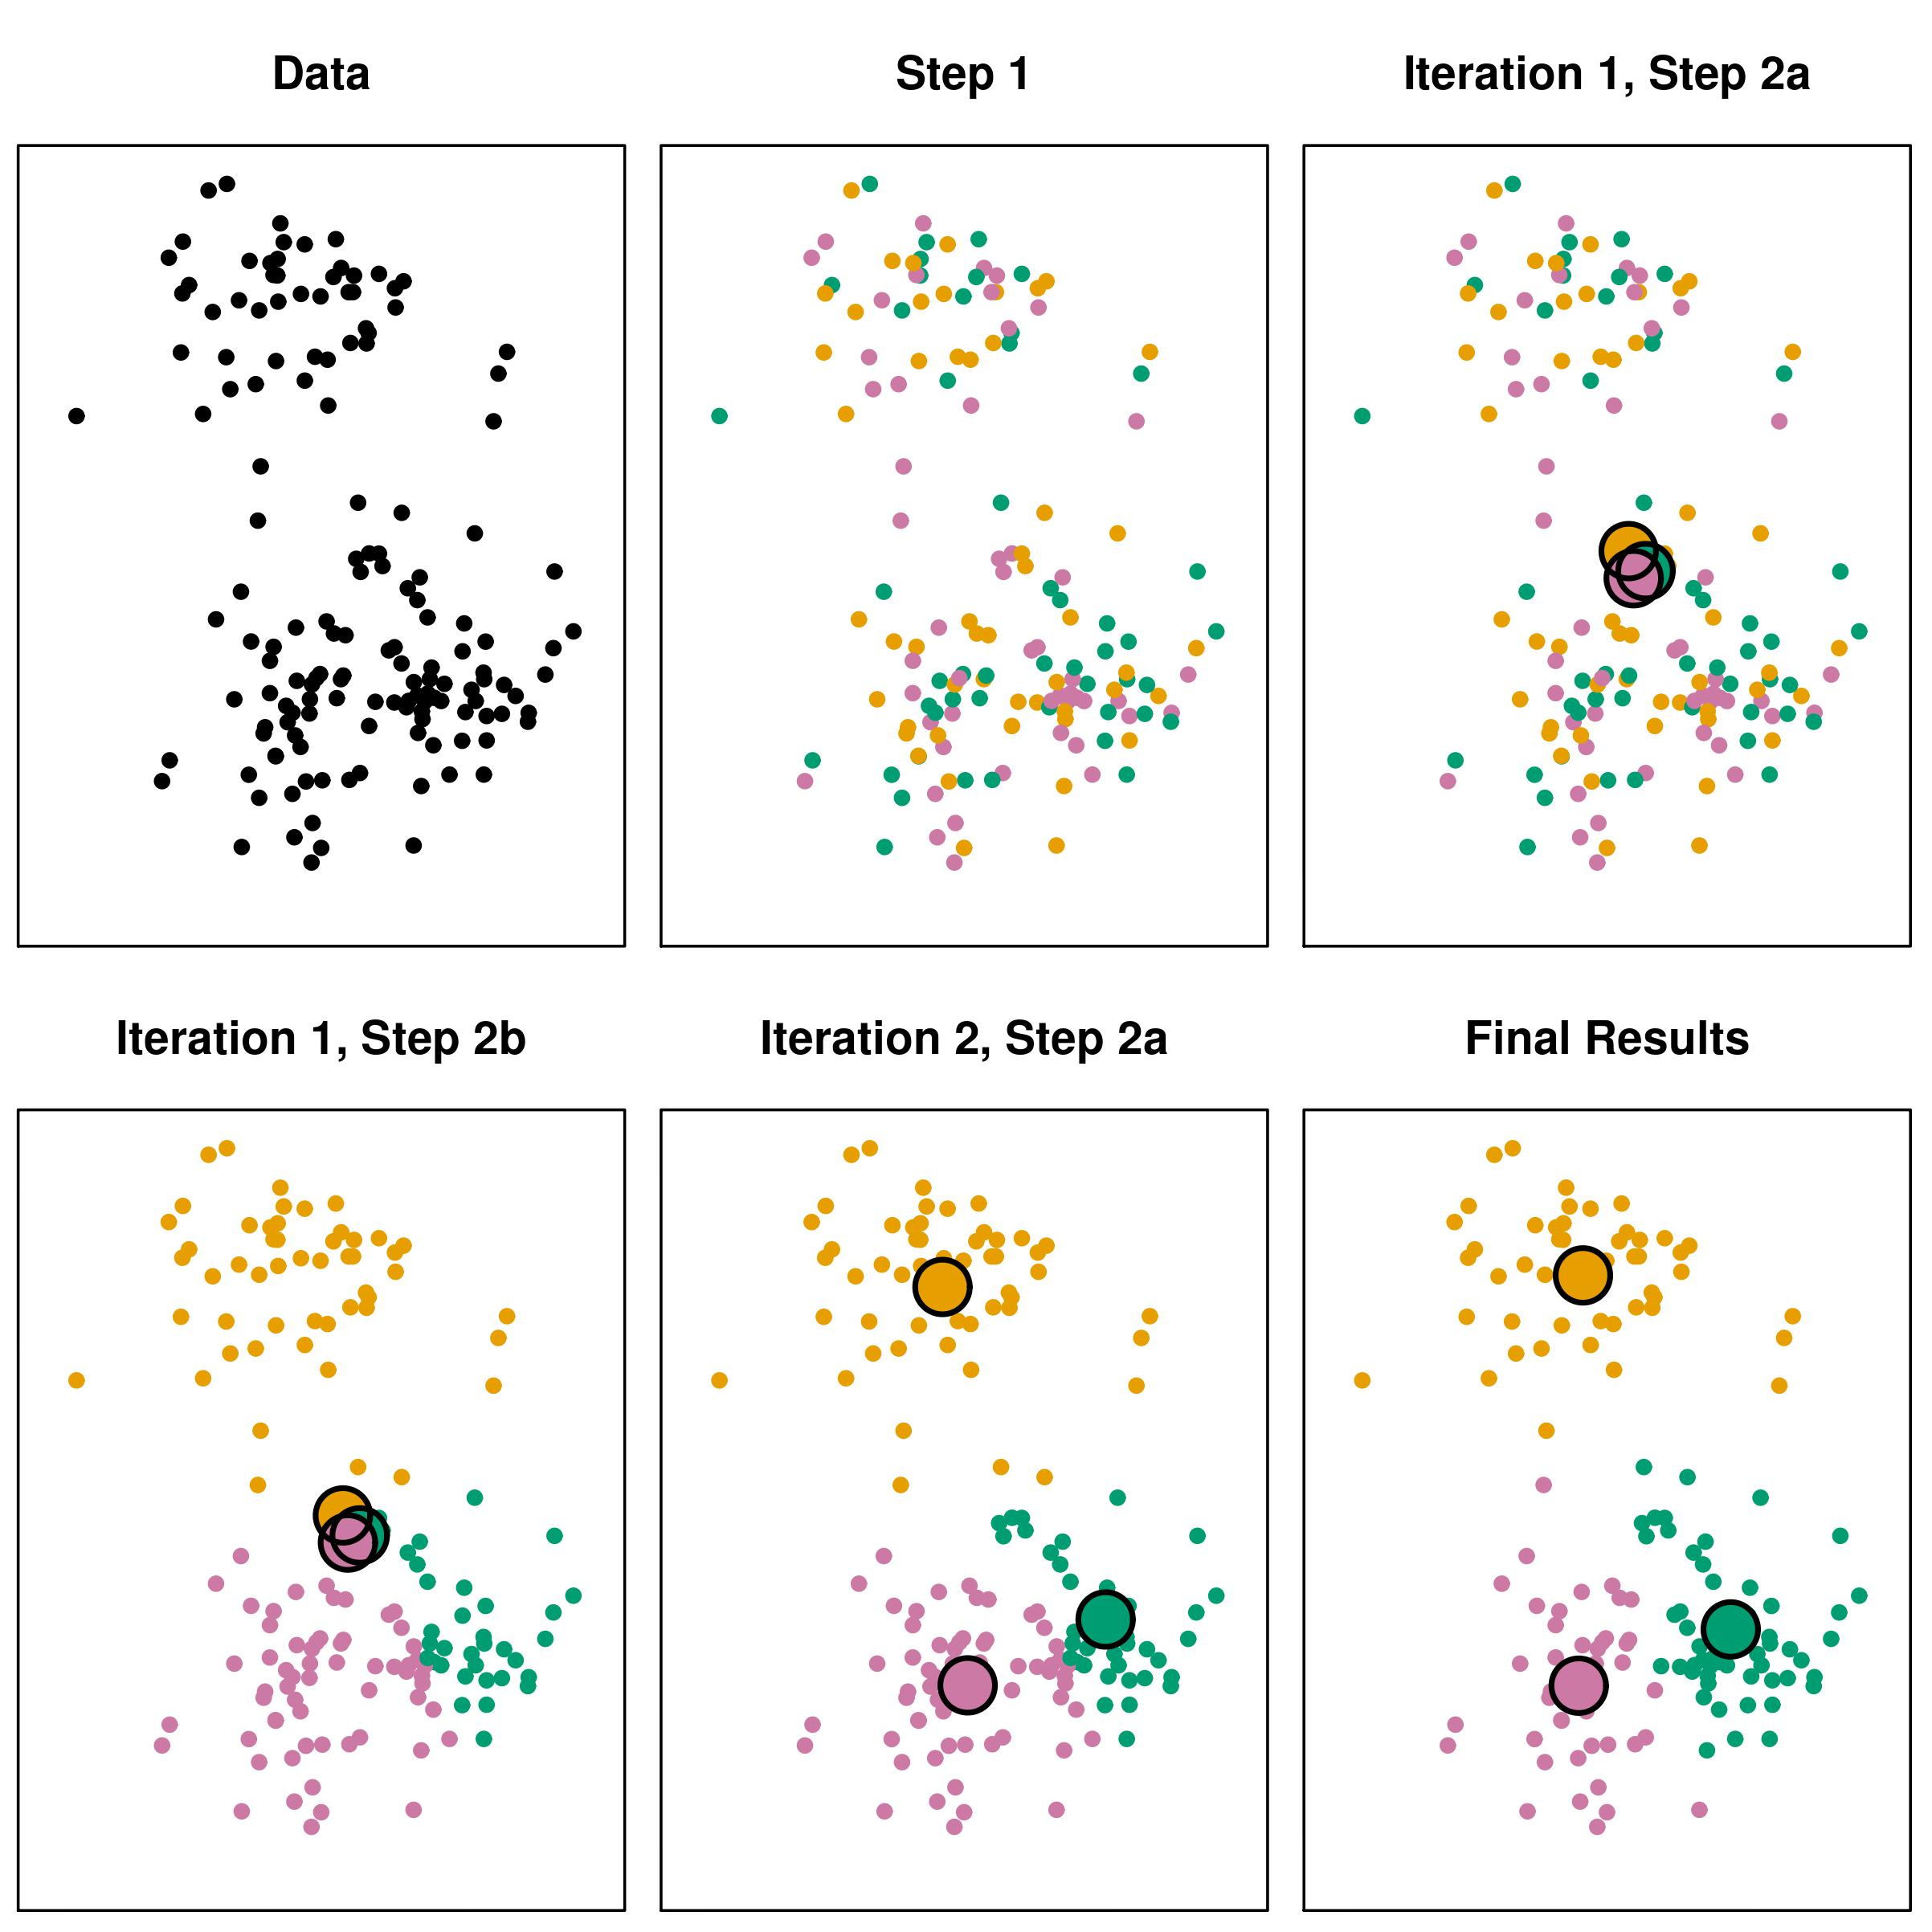

In [2]:
from IPython.display import Image
url="https://i.stack.imgur.com/FQhxk.jpg"
Image(url,width=800, height=800)

<font color="blue">


In the step 1 in the algorithm, each observation is randomly assigned to a cluster.

In the step 2a in the algorithm,the cluster centroid for each cluster is computed, which are shown as large colored disk as shown top-right of the figure.

Initially these centroids are almost overlapping as we can see from the figure because initial cluster assignments are chosen randomly.

In the step 2a in the algorithm(bottom-left of the figure above), each observation is assigned to the nearest centroid.

In bottom-center of the figure above, step 2a once again is performed which lead to new cluster centroids.

We basically keep repeating these steps until there is no new cluster which means data points are being reassigned to a new cluster centroid.

At the bottom-right, we have the results obtained after about 10 iterations

<h1 id="customer_segmentation_K_means"> 1.1. Customer Segmentation with K-Means:</h1>

In [3]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/Cust_Segmentation.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


<font color="blue">
Customer Id and Address columns are not really meaningful for discrete variables for clustering, so we will just drop them.

In [4]:
df.drop(["Customer Id","Address"],axis=1, inplace=True)
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [5]:
df.isnull().sum()

Age                  0
Edu                  0
Years Employed       0
Income               0
Card Debt            0
Other Debt           0
Defaulted          150
DebtIncomeRatio      0
dtype: int64

<font color="blue">
    There are only 150 missing values in a single column, we will fill them with the mean of this column

In [6]:
df["Defaulted"].fillna(df["Defaulted"].mean(),inplace=True)


In [7]:
df.isnull().sum()#So we have no missing data

Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
DebtIncomeRatio    0
dtype: int64

In [8]:
df.select_dtypes("object")


""
0
1
2
3
4
...
845
846
847
848


<font color="blue">
    #There is no any string data, all of them are numerical and ready for the algorithm
    
    # However, we need to standardize our data in order to get better clustering

In [9]:

from sklearn.preprocessing import StandardScaler
X = df.values
X = np.nan_to_num(X)
X = StandardScaler().fit_transform(X)
X

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.65560267, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.65560267,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.85216712,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.85216712,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.65560267, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.65560267, -0.2340332 ]])

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans=KMeans(n_clusters=3)

In [12]:
kmeans.fit(X)

KMeans(n_clusters=3)

In [13]:
kmeans.cluster_centers_
# Here are the cluster center vectors

array([[ 1.04785453,  0.20579422,  1.32306244,  1.47463724,  1.22252964,
         1.46623597, -0.19078225,  0.53232648],
       [-0.13115827, -0.14013994, -0.11967473, -0.27013871, -0.35078066,
        -0.38172357, -0.51875961, -0.35909459],
       [-0.440193  ,  0.24657994, -0.68953747, -0.37036125,  0.06222209,
        -0.03887948,  1.6600961 ,  0.62791431]])

In [14]:
labels=kmeans.labels_
labels
#These are the labels that the algorithm has determined for 3 clusters

array([1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1,
       2, 0, 0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 2, 2, 1, 0, 2, 0, 2, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 0, 1, 2, 1,
       2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 0, 1, 2, 2, 0, 1, 1, 1, 1,
       1, 2, 1, 2, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1,
       1, 1, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 2, 1, 2,
       1, 1, 2, 0, 2, 1, 1, 0, 2, 2, 1, 1, 1, 1, 2, 0, 1, 2, 1, 1, 1, 0,
       0, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1, 1, 2, 1, 2,
       0, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 2, 1, 1, 2, 1, 2, 0, 1,

<font color="blue">
    We will assign the labels to each row in dataframe and add our data frame.

In [15]:
df["Labels"]=labels
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Labels
0,41,2,6,19,0.124,1.073,0.0,6.3,1
1,47,1,26,100,4.582,8.218,0.0,12.8,0
2,33,2,10,57,6.111,5.802,1.0,20.9,2
3,29,2,4,19,0.681,0.516,0.0,6.3,1
4,47,1,31,253,9.308,8.908,0.0,7.2,0


<font color="blue">
    We can easily check the centroid values by averaging the features in each cluster as follows:

In [16]:
df.groupby("Labels").mean()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Labels,,,,,,,,
0,43.450704,1.901408,17.528169,103.478873,4.174197,8.059282,0.185352,13.746479
1,33.975332,1.580645,7.755218,36.269450,0.831554,1.782135,0.054568,7.760152
2,31.491713,1.939227,3.895028,32.408840,1.709017,2.946707,0.923410,14.388398


<font color="blue">
    We can visualzie oor data and see the differences according to their labels after the segmentation by the KMeans algorithm as follows:

Labels
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Income, dtype: object

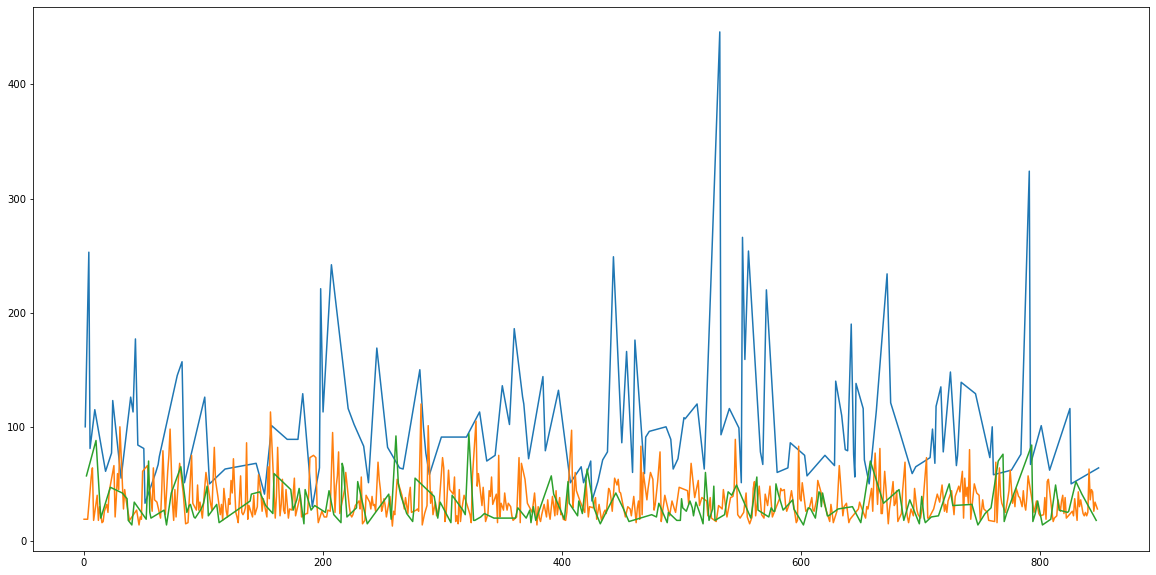

In [17]:
df.groupby("Labels")["Income"].plot(figsize=(20,10))
#Here we get the plot of cluster according to their incomes

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

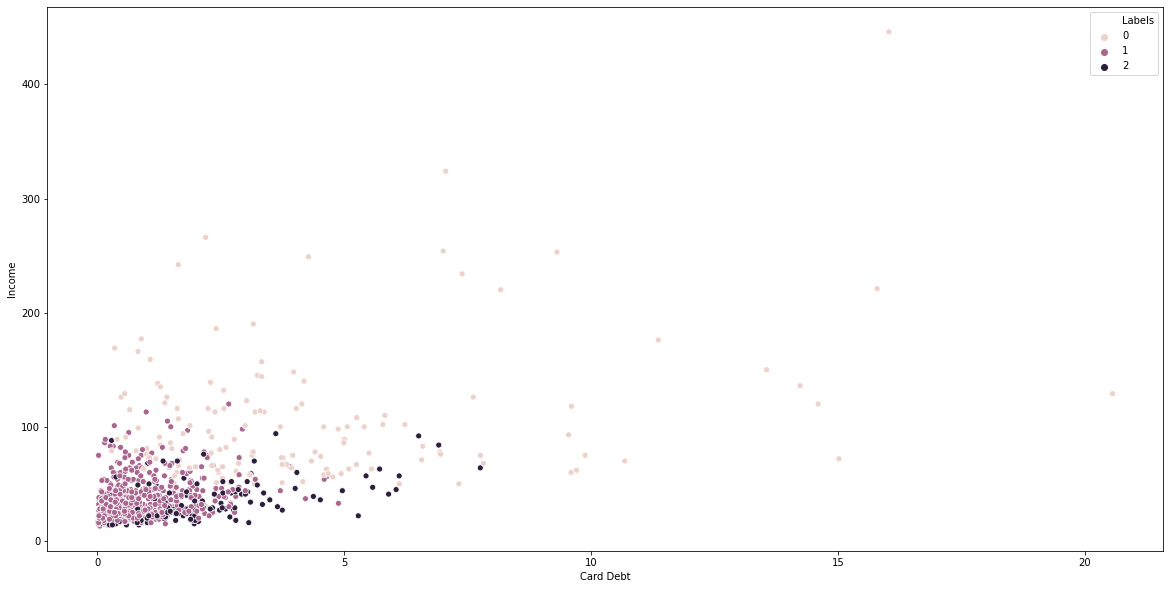

In [19]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="Card Debt", y="Income", hue="Labels",data=df)

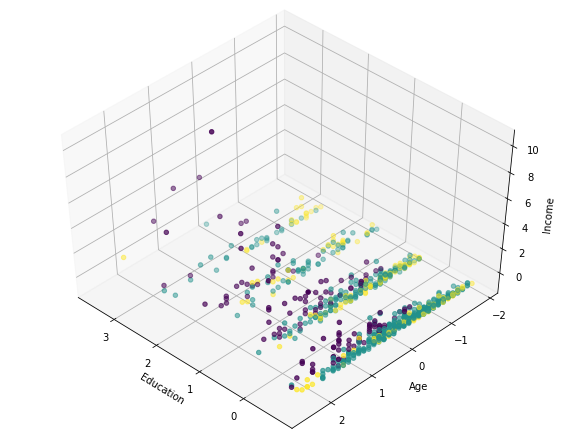

In [20]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(1, figsize=(8, 6))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
# plt.ylabel('Age', fontsize=18)
# plt.xlabel('Income', fontsize=16)
# plt.zlabel('Education', fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('Income')

ax.scatter(X[:, 1], X[:, 0], X[:, 3], c= labels.astype(np.float))

<font color="blue">
k-means will partition your customers into mutually exclusive groups, for example, into 3 clusters. The customers in each cluster are similar to each other demographically.
Now we can create a profile for each group, considering the common characteristics of each cluster. 
For example, the 3 clusters can be:

-   AFFLUENT, EDUCATED AND OLD AGED
-   MIDDLE AGED AND MIDDLE INCOME
-   YOUNG AND LOW INCOME

# 2. Hierarchical Clustering

<font color="blue">
    

Hierarchical clustering (also called hierarchical cluster analysis or HCA) is a method of cluster analysis which seeks to build a hierarchy of clusters. 
    
Strategies for hierarchical clustering generally fall into two types:[1]

1.Agglomerative: This is a "bottom-up" approach: each observation starts in its own cluster, and pairs of clusters are merged as one moves up the hierarchy.
    
2.Divisive: This is a "top-down" approach: all observations start in one cluster, and splits are performed recursively as one moves down the hierarchy.
    
In general, the merges and splits are determined in a greedy manner. The results of hierarchical clustering[2] are usually presented in a dendrogram.

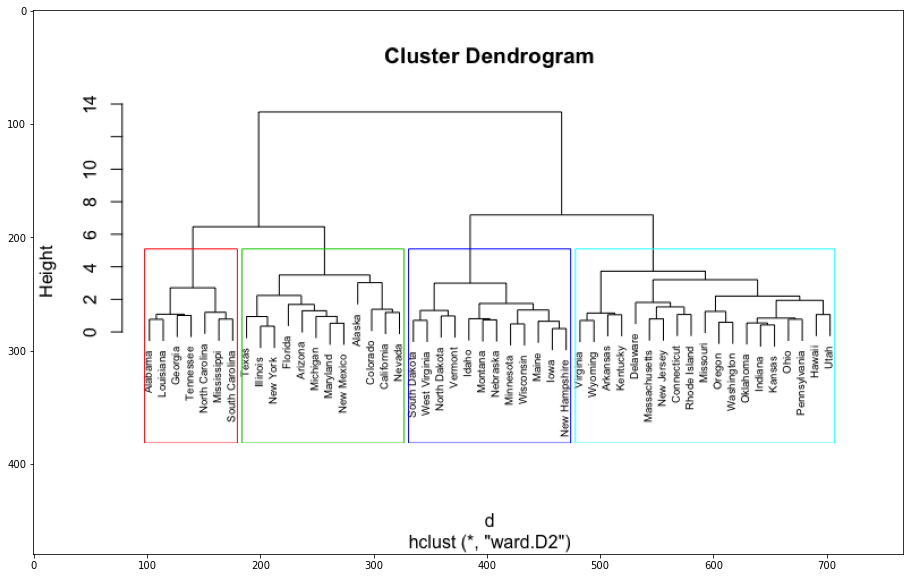

In [21]:
plt.figure(figsize=(20,10))
plt.imshow(plt.imread("../input/dendog/unnamed-chunk-13-1.png"))

# 2.1. Hierarchical Clustering on Vehicle Dataset

Lets imagine that an automobile manufacturer has developed prototypes for a new vehicle. Before introducing the new model into its range, the manufacturer wants to determine which existing vehicles on the market are most like the prototypes--that is, how vehicles can be grouped, which group is the most similar with the model, and therefore which models they will be competing against.

Our objective here, is to use clustering methods, to find the most distinctive clusters of vehicles. It will summarize the existing vehicles and help manufacturers to make decision about the supply of new models.

In [22]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%204/data/cars_clus.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   manufact   157 non-null    object 
 1   model      159 non-null    object 
 2   sales      159 non-null    object 
 3   resale     159 non-null    object 
 4   type       159 non-null    object 
 5   price      159 non-null    object 
 6   engine_s   159 non-null    object 
 7   horsepow   159 non-null    object 
 8   wheelbas   159 non-null    object 
 9   width      159 non-null    object 
 10  length     159 non-null    object 
 11  curb_wgt   159 non-null    object 
 12  fuel_cap   159 non-null    object 
 13  mpg        159 non-null    object 
 14  lnsales    159 non-null    object 
 15  partition  159 non-null    float64
dtypes: float64(1), object(15)
memory usage: 20.0+ KB


We see that there are 13 column that are seen as string although they are numerical, we need to transform them into numerical values.

In [23]:
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


In [24]:
df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']] = df[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric, errors='coerce')

In [25]:
df.select_dtypes("object")
#Now we have only two non numeric features

,manufact,model
0,Acura,Integra
1,Acura,TL
2,Acura,CL
3,Acura,RL
4,Audi,A4
...,...,...
154,Volvo,V70
155,Volvo,C70
156,Volvo,S80
157,NaN,newCar


In [26]:
df.isnull().sum()


manufact      2
model         0
sales         2
resale       38
type          2
price         2
engine_s      1
horsepow      1
wheelbas      1
width         1
length        1
curb_wgt      2
fuel_cap      1
mpg           3
lnsales       2
partition     0
dtype: int64

#Here we get a list of how many null values the columns has, there are not many null values, so we can just drop these rows with null values

In [27]:
df.dropna(inplace=True)
df.isnull().sum()

manufact     0
model        0
sales        0
resale       0
type         0
price        0
engine_s     0
horsepow     0
wheelbas     0
width        0
length       0
curb_wgt     0
fuel_cap     0
mpg          0
lnsales      0
partition    0
dtype: int64

In [28]:
df.head()
#we also need to reset index because it is not in order

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
3,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
4,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
5,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


In [29]:
df.reset_index(drop=True,inplace=True)

In [30]:
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


### Feature Selection and Normalization

We have nothing to do with manufact and model columns in our algorithm, so we will ignore them.

In [31]:
X=df.drop(["manufact","model"],axis=1)
X

,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,9.761,11.425,0.0,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,2.278,0.0
113,83.721,13.240,0.0,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,4.427,0.0
114,51.102,16.725,0.0,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,3.934,0.0
115,9.569,16.575,0.0,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,2.259,0.0


In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler=StandardScaler()

In [34]:
X=scaler.fit_transform(X)
X

array([[-0.56455364, -0.14464769, -0.5740605 , ...,  0.88524147,
        -0.43027206,  0.        ],
       [-0.26396817,  0.15952517, -0.5740605 , ...,  0.20113809,
         0.20404912,  0.        ],
       [-0.67602381,  1.01190147, -0.5740605 , ..., -0.4829653 ,
        -0.93923036,  0.        ],
       ...,
       [-0.10717937, -0.11306217, -0.5740605 , ...,  0.65720701,
         0.39997555,  0.        ],
       [-0.66289787, -0.12604252, -0.5740605 , ...,  0.42917255,
        -0.85740668,  0.        ],
       [-0.71605727, -0.36964042, -0.5740605 , ...,  0.42917255,
        -1.26051967,  0.        ]])

In [35]:
from sklearn.cluster import AgglomerativeClustering
#We will agglomerative clustering

In [36]:
model=AgglomerativeClustering()
#Hierarchical clustering does not require a pre-specified number of clusters

In [37]:
model.fit(X)

AgglomerativeClustering()

In [38]:
df["Label"]=model.labels_

#As we can see our data labeled as 2 distinct clusters and we add them into our data frame

In [39]:
df.head()

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,Label
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,1
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,0


Text(0, 0.5, 'mpg')

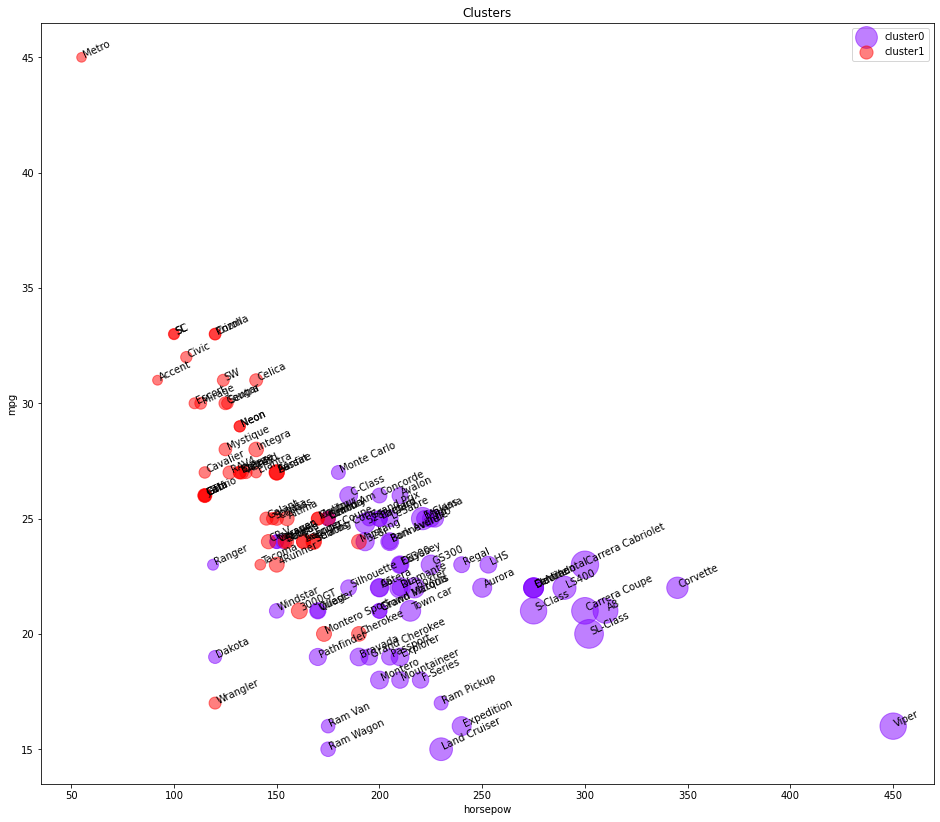

In [40]:
import matplotlib.cm as cm
n_clusters = max(model.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.Label == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

We can the distribution of each cluster using the scatter plot, but it is not very clear where is the centroid of each cluster. Moreover, there are 2 types of vehicles in our dataset, Label 0 represents "truck"  and and label 1 represents "car".